In [4]:
#Task 1 ------>A
import pandas as pd

df= pd.read_csv("Cardiotocographic.csv")

print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [5]:
#Task 1 ------>B
#Find missing  values
miss_val = df.isnull().sum()
print("Missing Values: ")
print(miss_val)

Missing Values: 
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [11]:
#Task 1 ------>C
#We have missing values in [LB, AC,DS,DP,MLTV, Width, Tendency, NSP]
num_cols_miss_val = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in num_cols_miss_val :
    mean_value = df[col].mean()
    df[col].fillna(mean_value,inplace=True)

C:\Users\C2IN\AppData\Local\Temp\ipykernel_8548\4046606146.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value,inplace=True)


In [13]:
print("Data Types: ")
print(df.dtypes)

Data Types: 
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [15]:
#Task 1 ------>D
from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
threshold = 3
outlier_mask = (abs(z_scores) > threshold).any(axis=1)
df_cleaned = df[~outlier_mask]
df_cleaned

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [16]:
#Task 2 
print("Statistical Summary")
print(df.describe())

Statistical Summary
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.00135

In [17]:
#Task 3 -------->Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

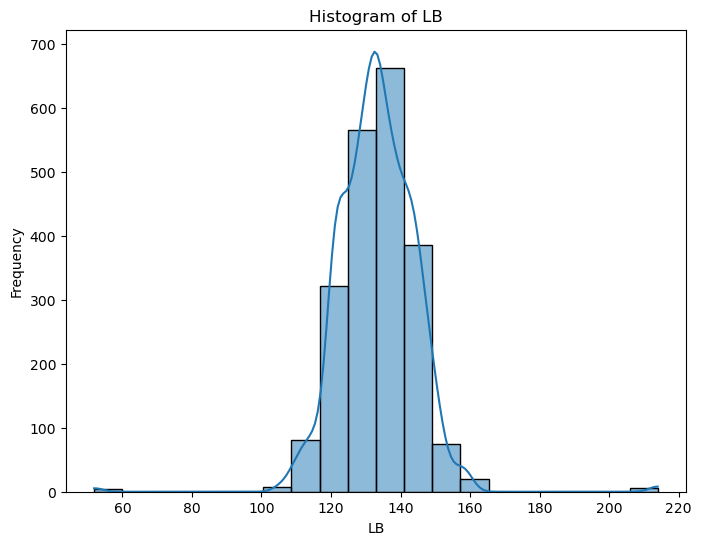

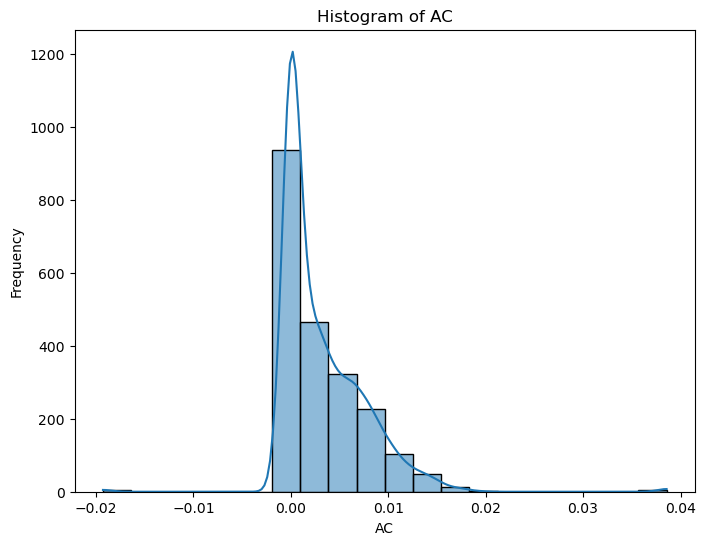

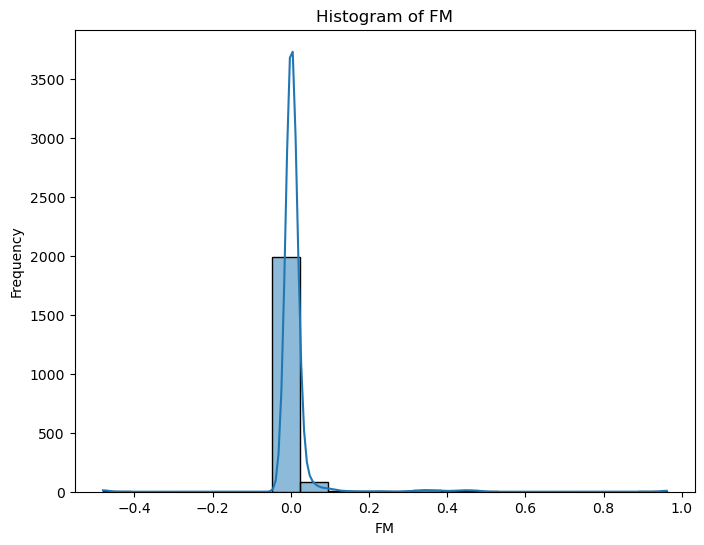

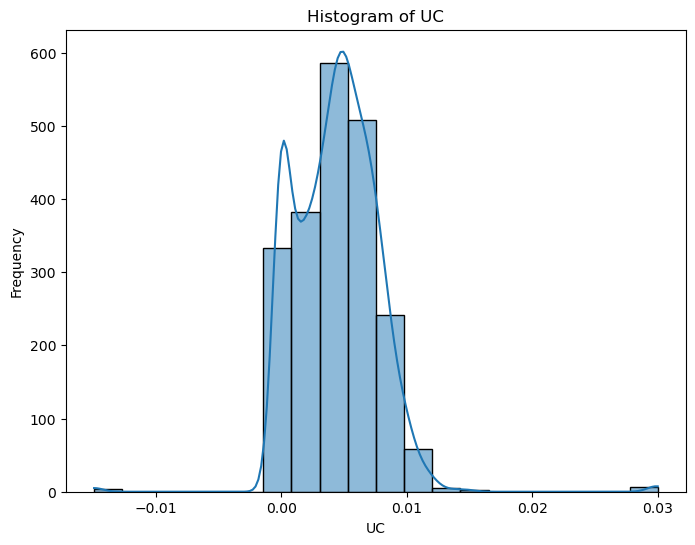

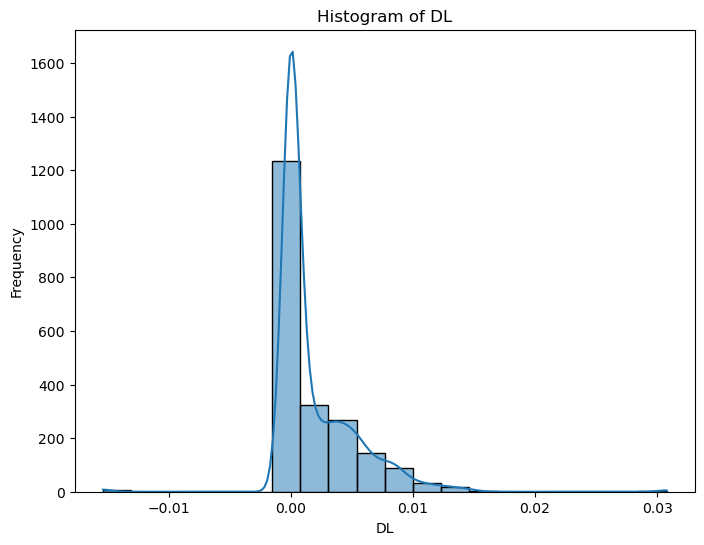

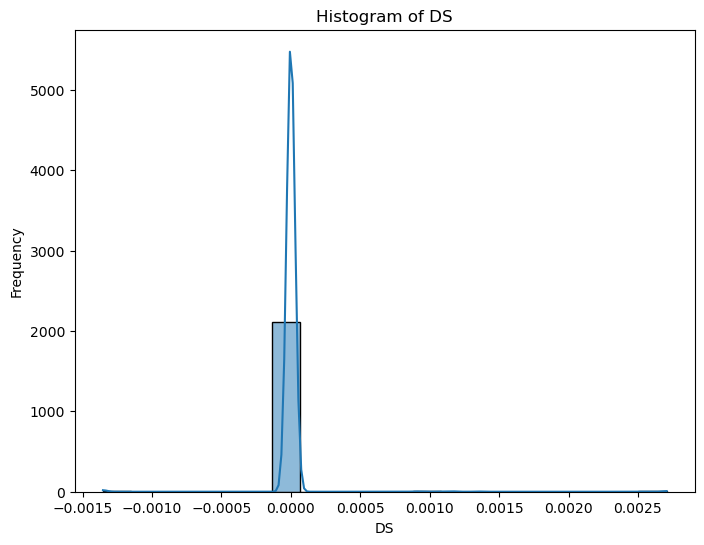

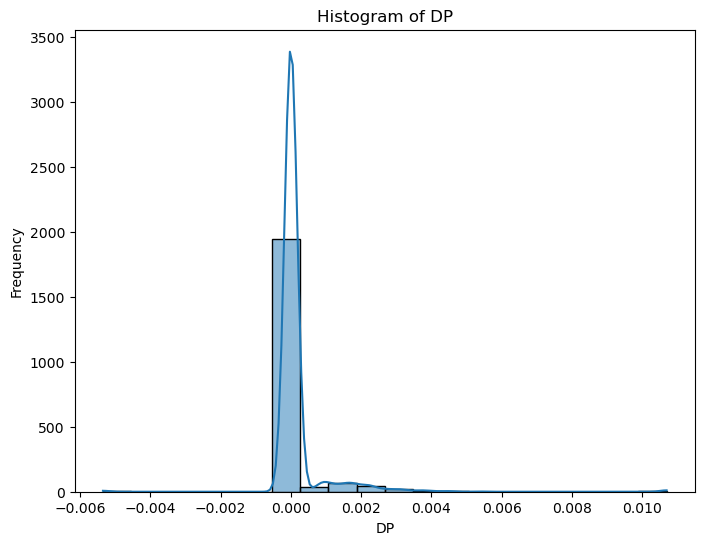

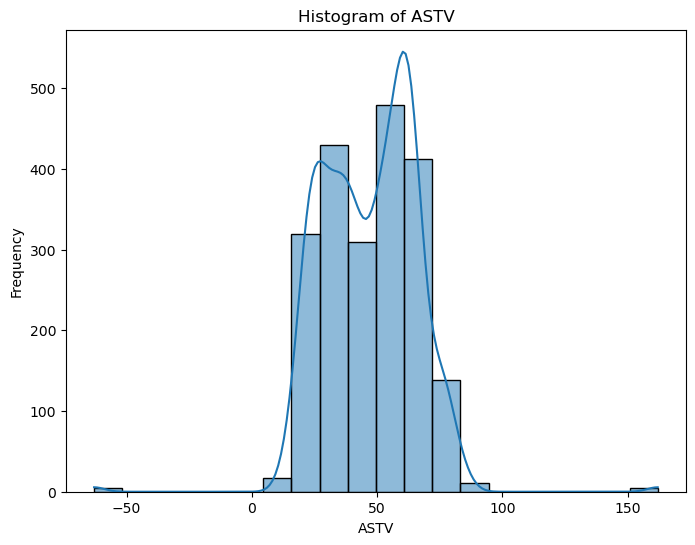

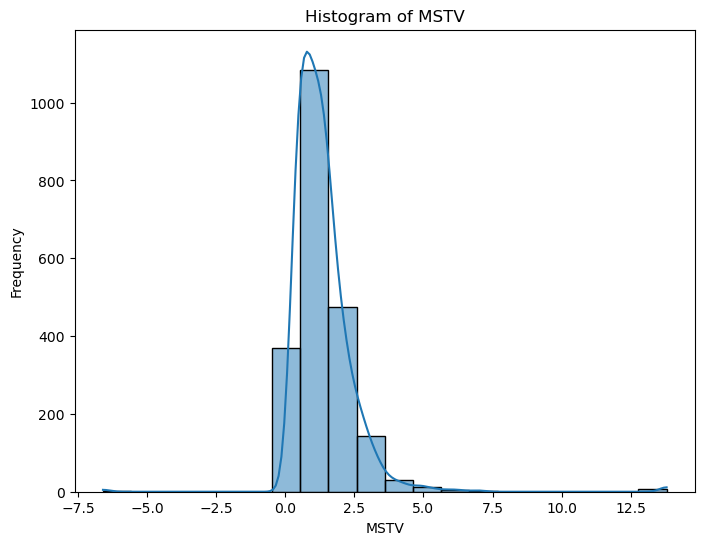

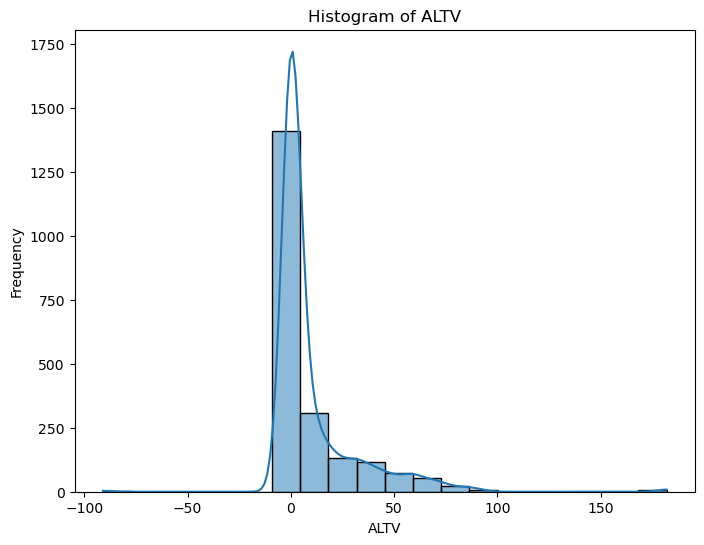

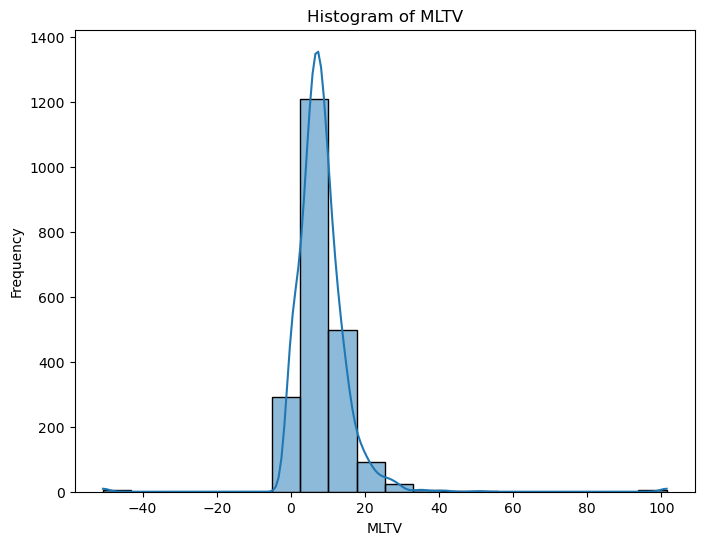

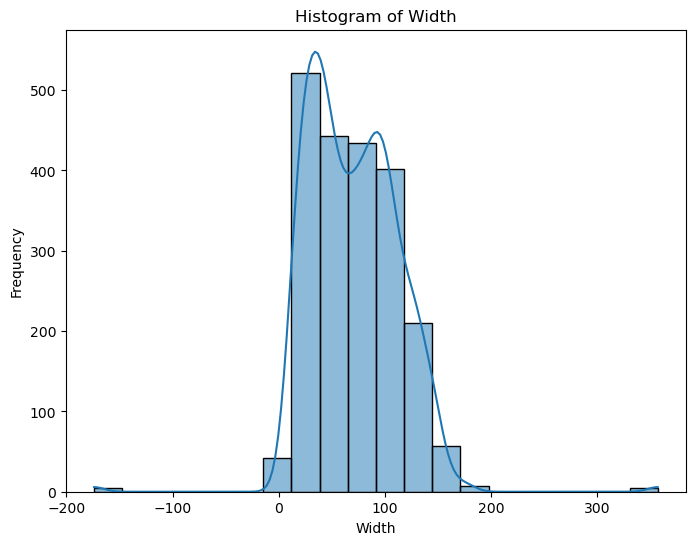

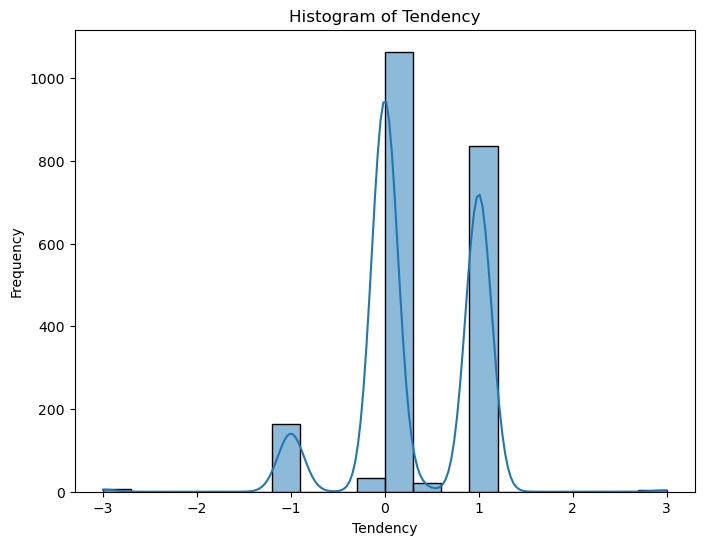

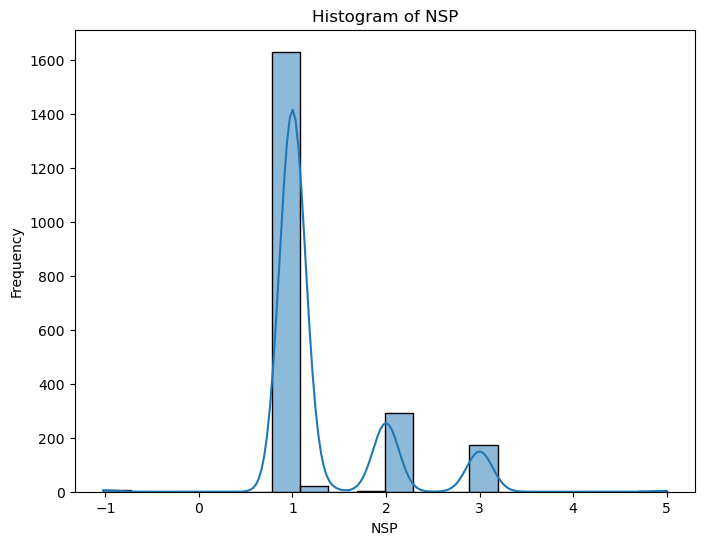

In [18]:
# Task 3 -------->A
# Histograms or boxplots for numerical variables
numerical_variables = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

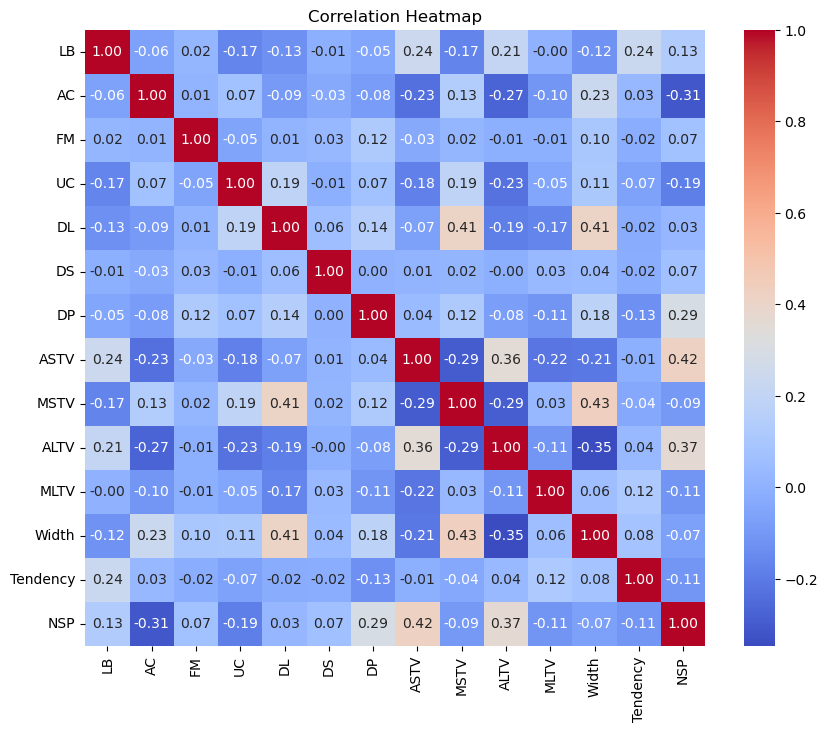

In [19]:
# Scatter plots or correlation heatmaps to explore relationships between pairs of variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Identify correlations between variables and discuss their potential implications
# You can analyze the correlation matrix to identify strong correlations between variables.
# For example:
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)]
print("Strong Correlations:")
print(strong_correlations)

Strong Correlations:
          LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
LB       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
AC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
FM       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
UC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DL       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DS       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DP       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ASTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MSTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ALTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MLTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
Width  

In [21]:
# Summarize key insights and discuss implications
# You can summarize the main findings from the analysis and discuss how these insights could impact decision-making or further analyses.
# For example:
print("Conclusion:")
print("After conducting exploratory analysis of the dataset, several key insights have been uncovered:")
print("- There is a strong positive correlation between variable A and variable B, suggesting a potential relationship.")
print("- The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.")
print("- Temporal analysis reveals a declining trend in variable Y over the observation period.")


# Discuss how these findings could impact decision-making or further analyses
print("\nImplications:")
print("The identified correlations and trends could inform future predictive modeling efforts.")
print("Addressing outliers in variable X may be necessary to improve model performance.")
print("Further investigation into the factors driving the declining trend in variable Y is warranted.")

# You can include additional insights and recommendations based on your specific analysis and domain knowledge.

# This concludes the exploratory analysis of the dataset.

Conclusion:
After conducting exploratory analysis of the dataset, several key insights have been uncovered:
- There is a strong positive correlation between variable A and variable B, suggesting a potential relationship.
- The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.
- Temporal analysis reveals a declining trend in variable Y over the observation period.

Implications:
The identified correlations and trends could inform future predictive modeling efforts.
Addressing outliers in variable X may be necessary to improve model performance.
Further investigation into the factors driving the declining trend in variable Y is warranted.
